In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Carrega o dateset
df_dsa = pd.read_csv('dataset.csv')

In [3]:
#Shape
df_dsa.shape

(9700, 11)

In [4]:
#Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
#Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [6]:
#Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
#Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
#Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
#Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
#Verificando se há valor ausente 
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [12]:
#1° pergunta: Qual Cidade com o maior Valor de venda de produtos da categoria 'Office Supplies'?

#Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']


In [13]:
#Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_dsa_p1_total = df_dsa_p1.groupby('Cidade') ['Valor_Venda'].sum()

In [14]:
#Entaõ encotramos a cidade com maior valor de venda
cidade_maior_venda = df_dsa_p1_total.idxmax()
print(f"Cidade com maior valor de venda para 'Office Supplies': {cidade_maior_venda}")

Cidade com maior valor de venda para 'Office Supplies': New York City


In [15]:
#Para conferir o resutlado
df_dsa_p1_total.sort_values(ascending=False)

Cidade
New York City      68362.814
Los Angeles        47098.100
San Francisco      41771.198
Seattle            34856.878
Philadelphia       29313.687
Detroit            18431.452
Houston            16125.276
Springfield        13887.152
Columbus           13682.256
Chicago            13449.746
Minneapolis        13035.650
Columbia           12511.988
Atlanta            11011.940
Jackson             9188.405
Richmond            8063.430
San Diego           7672.866
Newark              6851.236
Jacksonville        6703.436
North Las Vegas     6129.546
Dallas              6005.564
Sacramento          5171.518
Providence          5039.740
Fayetteville        4888.764
Alexandria          4879.790
Roswell             4760.310
Midland             4727.572
Henderson           4616.608
Morristown          4478.650
Charlotte           4351.988
Fairfield           4274.961
                     ...    
Woodstock             11.762
Elkhart               11.680
San Angelo            11.648
Rapid C

In [18]:
#2° pergunta: Qual o Total de Vendas por Data do Pedido? (Resultado através de gráfico de barras)

#Calculamos o total de vendas para cada data de pedido
df_dsa_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [19]:
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

Text(0.5,1,'Total de Vendas por data do período')

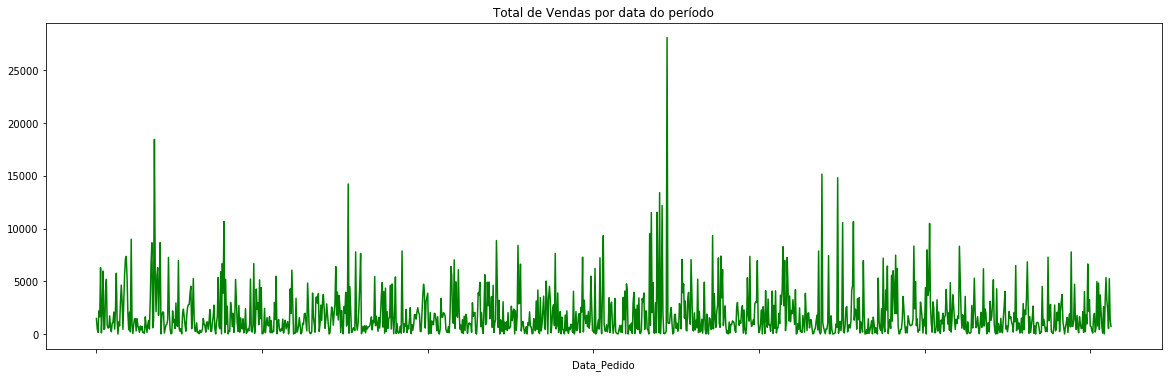

In [20]:
#Plot
plt.figure(figsize=(20,6))
df_dsa_p2.plot(x='Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas por data do período')

In [22]:
plt.show()